This code creates a database with a list of publications data from Google 
Scholar.
The data acquired from GS is Title, Citations, Links and Rank.
It is useful for finding relevant papers by sorting by the number of citations
This example will look for the top 100 papers related to the keyword 
'non intrusive load monitoring', so that you can rank them by the number of citations

As output this program will plot the number of citations in the Y axis and the 
rank of the result in the X axis. It also, optionally, export the database to
a .csv file.

Before using it, please update the initial variables

In [1]:
# Update these variables according to your requirement
keyword = "'adaptative filtering'" # the double quote will look for the exact keyword,
                                            # the simple quote will also look for similar keywords
number_of_results = 100 # number of results to look for on Google Scholar
save_database = False # choose if you would like to save the database to .csv (recommended to correctly visualize the URLs)
path = 'C:/results_sorting.csv' # path to save the data

Main code for searching and sorting the results

In [2]:
# -*- coding: utf-8 -*-
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd


def get_citations(content):
    out = 0
    for char in range(0,len(content)):
        if content[char:char+9] == 'Cited by ':
            init = char+9                          
            for end in range(init+1,init+6):
                if content[end] == '<':
                    break
            out = content[init:end]
    return int(out)
    
def get_year(content):
    for char in range(0,len(content)):
        if content[char] == '-':
            out = content[char-5:char-1]
    if not out.isdigit():
        out = 0
    return int(out)

def get_author(content):
    for char in range(0,len(content)):
        if content[char] == '-':
            out = content[2:char-1]
            break
    return out

# Start new session
session = requests.Session()

# Variables
links = list()
title = list()
citations = list()
year = list()
rank = list()
author = list()
rank.append(0) # initialization necessary for incremental purposes

# Get content 
for n in range(0, number_of_results, 10):    
    url = 'https://scholar.google.com/scholar?start='+str(n)+'&q='+keyword.replace(' ','+')
    page = session.get(url)
    c = page.content
    
    # Create parser
    soup = BeautifulSoup(c, 'html.parser')
    
    # Get stuff
    mydivs = soup.findAll("div", { "class" : "gs_r" })
    
    for div in mydivs:
        try:
            links.append(div.find('h3').find('a').get('href'))
        except: # catch *all* exceptions
            links.append('Look manually at: https://scholar.google.com/scholar?start='+str(n)+'&q'+keyword.replace(' ','+'))
        
        try:
            title.append(div.find('h3').find('a').text)
        except: 
            title.append('Could not catch title')
            
        citations.append(get_citations(str(div.format_string)))
        year.append(get_year(div.find('div',{'class' : 'gs_a'}).text))
        author.append(get_author(div.find('div',{'class' : 'gs_a'}).text))
        rank.append(rank[-1]+1)

# Create a dataset and sort by the number of citations
data = pd.DataFrame(zip(author, title, citations, year, links), index = rank[1:], 
                    columns=['Author', 'Title', 'Citations', 'Year', 'Source'])
data = data.rename_axis('Rank', axis="columns")

data_ranked = data.sort_values('Citations', ascending=False)

# Save results
if save_database:
    data_ranked.to_csv(path, encoding='utf-8')

print('Done!')

Done!


Now, let's visualize the top 100 papers sorted by the number of citations. Note that the first column is the Rank in which the result was on Google Scholar. 

In [3]:
data_ranked

Rank,Author,Title,Citations,Year,Source
88,Proakis,Companders,47208,2001,http://onlinelibrary.wiley.com/doi/10.1002/047...
1,Haykin,Could not catch title,23007,2008,Look manually at: https://scholar.google.com/s...
64,R Jang,ANFIS: adaptive-network-based fuzzy inference ...,12206,1993,http://ieeexplore.ieee.org/abstract/document/2...
60,"Kalman, RS Bucy",New results in linear filtering and prediction...,6418,1961,https://fluidsengineering.asmedigitalcollectio...
2,"Goodwin, KS Sin",Adaptive filtering prediction and control,5464,2014,https://books.google.com/books?hl=en&lr=&id=0_...
62,"Widrow, JR Glover, JM McCool…",Adaptive noise cancelling: Principles and appl...,4434,1975,http://ieeexplore.ieee.org/abstract/document/1...
77,"Van Veen, KM Buckley",Beamforming: A versatile approach to spatial f...,3414,1988,http://ieeexplore.ieee.org/abstract/document/665/
80,"Chang, B Yu, M Vetterli",Adaptive wavelet thresholding for image denois...,2743,2000,http://ieeexplore.ieee.org/abstract/document/8...
47,Frost,An algorithm for linearly constrained adaptive...,2492,1972,http://ieeexplore.ieee.org/abstract/document/1...
98,"P Blom, Y Ba",The interacting multiple model algorithm for s...,2286,1988,http://ieeexplore.ieee.org/abstract/document/1...


Position of these results on Google Scholar

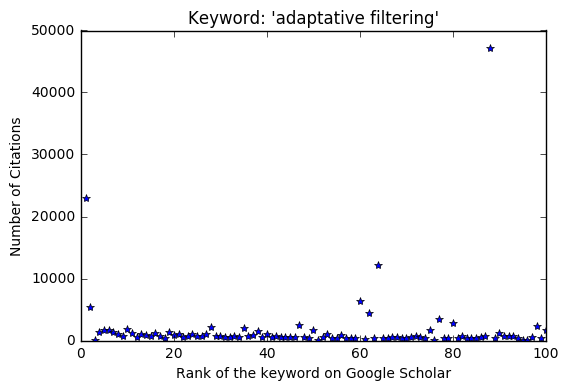

In [4]:
plt.plot(rank[1:],citations,'*')
plt.ylabel('Number of Citations')
plt.xlabel('Rank of the keyword on Google Scholar')
plt.title('Keyword: '+keyword)
plt.show()

Another interesting way of sorting these results is by the number of citations / year

In [9]:
data_ranked['cit/year'] = data_ranked['Citations']/(2017 - data_ranked['Year'])

In [12]:
data_ranked.sort_values('cit/year', ascending=False)

Rank,Author,Title,Citations,Year,Source,cit/year
88,Proakis,Companders,47208,2001,http://onlinelibrary.wiley.com/doi/10.1002/047...,2950.500000
1,Haykin,Could not catch title,23007,2008,Look manually at: https://scholar.google.com/s...,2556.333333
2,"Goodwin, KS Sin",Adaptive filtering prediction and control,5464,2014,https://books.google.com/books?hl=en&lr=&id=0_...,1821.333333
53,"Kumar, P Varaiya","Stochastic systems: Estimation, identification...",1116,2015,http://epubs.siam.org/doi/pdf/10.1137/1.978161...,558.000000
64,R Jang,ANFIS: adaptive-network-based fuzzy inference ...,12206,1993,http://ieeexplore.ieee.org/abstract/document/2...,508.583333
27,Farhan,Adaptive filters: theory and applications,1089,2013,https://books.google.com/books?hl=en&lr=&id=Fm...,272.250000
80,"Chang, B Yu, M Vetterli",Adaptive wavelet thresholding for image denois...,2743,2000,http://ieeexplore.ieee.org/abstract/document/8...,161.352941
10,Sayed,Fundamentals of adaptive filtering,1907,2003,https://books.google.com/books?hl=en&lr=&id=Va...,136.214286
42,Sayed,Adaptive filters,804,2011,https://books.google.com/books?hl=en&lr=&id=VB...,134.000000
77,"Van Veen, KM Buckley",Beamforming: A versatile approach to spatial f...,3414,1988,http://ieeexplore.ieee.org/abstract/document/665/,117.724138
